# Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import quantile, where, random
from flaml import AutoML 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import matplotlib.gridspec as gridspec
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Attack Dataset for identifying attacks

In [7]:
df = pd.read_csv("Subdataset2.csv", skipinitialspace = True)
df['DATETIME'] = pd.to_datetime(df['DATETIME'], infer_datetime_format=True)

In [8]:
attack1 = df[(df["DATETIME"]>="13/09/20 23:00") & (df["DATETIME"]<="16/09/20 00:00")]
attack1 = attack1.assign(id = 1)

In [9]:
attack2 = df[(df["DATETIME"]>="26/09/20 20:00") & (df["DATETIME"]<="27/09/20 10:00")]
attack2 = attack2.assign(id = 2)

In [10]:
attack3 = df[(df["DATETIME"]>="09/10/20 09:00") & (df["DATETIME"]<="11/10/20 20:00")]
attack3 = attack3.assign(id = 3)

In [11]:
attack4 = df[(df["DATETIME"]>="29/10/20 19:00") & (df["DATETIME"]<="02/11/20 16:00")]
attack4 = attack4.assign(id = 4)

In [12]:
attack5 = df[(df["DATETIME"]>="26/11/20 17:00") & (df["DATETIME"]<="29/11/20 04:00")]
attack5 = attack5.assign(id = 5)

In [13]:
attack6 = df[(df["DATETIME"]>="06/12/20 07:00") & (df["DATETIME"]<="10/12/20 04:00")]
attack6 = attack6.assign(id = 6)

In [14]:
attack7 = df[(df["DATETIME"]>="14/12/20 15:00") & (df["DATETIME"]<="19/12/20 04:00")]
attack7 = attack7.assign(id = 7)

## Concatinating All Different Attack

In [15]:
new = pd.concat([attack1, attack2, attack3, attack4, attack5, attack6, attack7], ignore_index =True)
new = new.assign(label = "ATTACK")
new.to_csv("Attack.csv", index=False)

In [16]:
df_diff = df.merge(new, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
df_diff = df_diff.drop(['id','label', 'DATETIME',"_merge"], axis =1)
df_diff

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1,93.65,...,28.26,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64
1,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1,89.43,...,24.39,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15
2,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1,89.89,...,23.84,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56
3,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1,88.12,...,27.00,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38
4,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1,87.03,...,26.67,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,2.65,2.37,3.85,3.04,3.82,4.94,2.19,120.08,1,0.00,...,27.42,70.03,27.38,84.14,18.45,81.67,18.34,66.04,29.88,28.98
4858,2.24,2.56,3.42,2.92,3.69,5.02,1.97,119.12,1,0.00,...,27.71,68.60,27.66,83.46,25.40,60.85,25.28,66.89,30.19,29.29
4859,1.91,2.76,2.95,2.49,2.70,5.14,1.87,120.71,1,0.00,...,26.77,85.63,26.84,82.82,24.46,59.56,24.34,66.08,29.68,28.78
4860,1.52,2.52,3.33,2.03,1.69,5.10,1.39,120.02,1,0.00,...,25.75,86.15,25.78,103.63,24.77,59.01,24.65,66.42,28.98,28.08


## Importing Attack Dataframe

In [19]:
anomaly = pd.read_csv("Attack.csv")
anomaly_with_attack = pd.concat([anomaly, new[:20]])
anomaly_with_attack = anomaly_with_attack.drop(['id','label', 'DATETIME'], axis =1)
anomaly_with_attack.to_csv("Anomaly_with_attack.csv", index= False)

# Importing Normal Dataset for identifying outliers

In [20]:
df = pd.read_csv("Subdataset1.csv")

## Detection of Outliers using different method

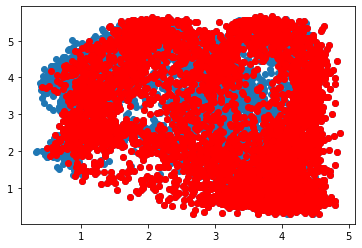

In [21]:
X = df.drop(['DATETIME'], axis = 1)
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=150, contamination=0.5)
pred = iforest.fit_predict(X)
anom_index = np.where(pred==-1)
values_iforest = X.iloc[anom_index]
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(values_iforest.iloc[:,0], values_iforest.iloc[:,1], color='r')
plt.show()

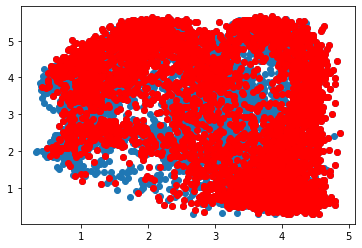

In [22]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.5)
svm.fit(X)
pred = svm.predict(X)
anom_index = np.where(pred==-1)
values_svm = X.iloc[anom_index]
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(values_svm.iloc[:,0], values_svm.iloc[:,1], color='r')
plt.show()

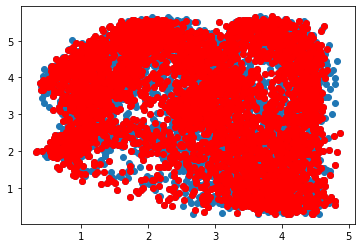

In [23]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = 5, contamination = 0.5)
y_pred = lof.fit_predict(X)
outlier_index = np.where(y_pred == -1)
values_lof = X.iloc[outlier_index]
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(values_lof.iloc[:,0], values_lof.iloc[:,1], color='r')
plt.show()

## Merging attack and Normal Dataset and removing overlapping outliers

In [24]:
Anomaly_df = values_lof.merge(values_iforest, how = 'inner' ,indicator=False)
Anomaly_df = Anomaly_df.merge(values_svm, how = 'inner' ,indicator=False)
df_diff = X.merge(Anomaly_df, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
final_df = df_diff.drop(['_merge'], axis = 1)
benign = df.loc[final_df.index]
benign.to_csv('benign.csv', index = False)

In [25]:
df3 = pd.read_csv('Attack.csv', skipinitialspace=True)
df4 = pd.read_csv('Benign.csv')
final = pd.concat([df3, df4])
final['id'].fillna(0, inplace = True)
final['label'].fillna("NORMAL", inplace = True)
final
final.to_csv('Final_Dataset.csv', index = False)

# Exploring Final Dataset 

In [27]:
df = pd.read_csv('Final_Dataset.csv')
df['label'] = df['label'].replace({"ATTACK":1, "NORMAL":0})
df['label'].value_counts()
df = df.drop([df.columns[0], "id"], axis = 1)
df

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,label
0,3.510000,2.550000,3.600000,2.240000,1.620000,4.970000,2.840000,93.190000,1,93.210000,...,86.280000,22.500000,82.830000,16.840000,79.830000,16.560000,80.370000,39.760000,24.200000,1
1,3.660000,1.680000,4.000000,2.230000,1.980000,5.230000,3.130000,91.440000,1,91.460000,...,87.840000,21.860000,83.520000,29.210000,85.830000,29.210000,54.310000,41.200000,23.540000,1
2,3.840000,0.830000,4.440000,2.460000,2.510000,5.470000,3.450000,90.220000,1,90.240000,...,87.250000,21.130000,84.470000,29.890000,86.620000,29.890000,55.200000,41.960000,22.790000,1
3,3.810000,0.650000,4.890000,2.930000,3.070000,5.500000,3.950000,94.770000,1,94.790000,...,91.250000,25.830000,86.160000,28.100000,86.300000,28.100000,57.490000,28.880000,27.980000,1
4,3.750000,1.000000,5.240000,3.420000,3.670000,5.360000,4.780000,94.800000,1,94.810000,...,76.130000,27.650000,88.040000,18.200000,83.380000,17.950000,85.430000,30.340000,29.440000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10288,3.488391,3.012396,3.915844,3.102595,1.640942,5.500000,4.489231,95.840668,1,95.859444,...,75.043564,28.807816,85.626350,21.432732,81.336197,21.325905,71.168297,31.422609,30.522608,0
10289,3.349998,3.393529,3.704372,3.318569,1.976920,5.500000,4.797106,96.594833,1,96.613831,...,71.224411,28.940384,84.560669,21.076448,81.414070,20.970821,71.399384,31.532953,30.632954,0
10290,3.114685,3.948144,3.123156,3.060679,2.593729,4.997561,2.207609,96.929070,1,96.948166,...,86.823753,28.358240,84.593727,20.571791,81.679344,20.457272,66.498741,31.281141,30.381142,0
10291,2.931601,3.892631,3.542954,3.025374,2.923712,5.104730,2.071863,97.206474,1,97.225647,...,87.819832,28.297560,83.987007,20.450956,82.001610,20.337372,66.844086,31.210789,30.310789,0


## Removing Outlier Mathematically

In [29]:
def removeAutoOutlier(df,minPercent,maxPercent):
    begin_size = len(df)

    outlier_cols = []
    for colname, colvalue in df.iteritems():
        if type(colvalue[1]) != str and colvalue.nunique() >= 10: # 
            outlier_cols.append(colname)

    def drop_outliers(df, field_name):
        iqr = 1.5 * (np.percentile(df[field_name], maxPercent) - np.percentile(df[field_name], minPercent))
        df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name],maxPercent))].index, inplace=True)
        df.drop(df[df[field_name] < (np.percentile(df[field_name], minPercent) - iqr)].index, inplace=True)

    for col in outlier_cols:
        drop_outliers(df,col)

    after_size = len(df)

    print("begin size=",begin_size)
    print("after size=",after_size)
    print("outler size=",after_size - begin_size)

In [30]:
removeAutoOutlier(df,5,95)

begin size= 10293
after size= 10086
outler size= -207


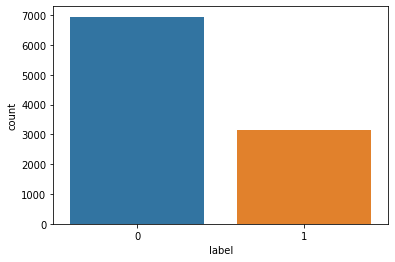

0    6945
1    3141
Name: label, dtype: int64


In [31]:
sns.countplot(df.label)
plt.show()
print(df.label.value_counts())

## Plotting Relation Graph Between Normal and Attacks

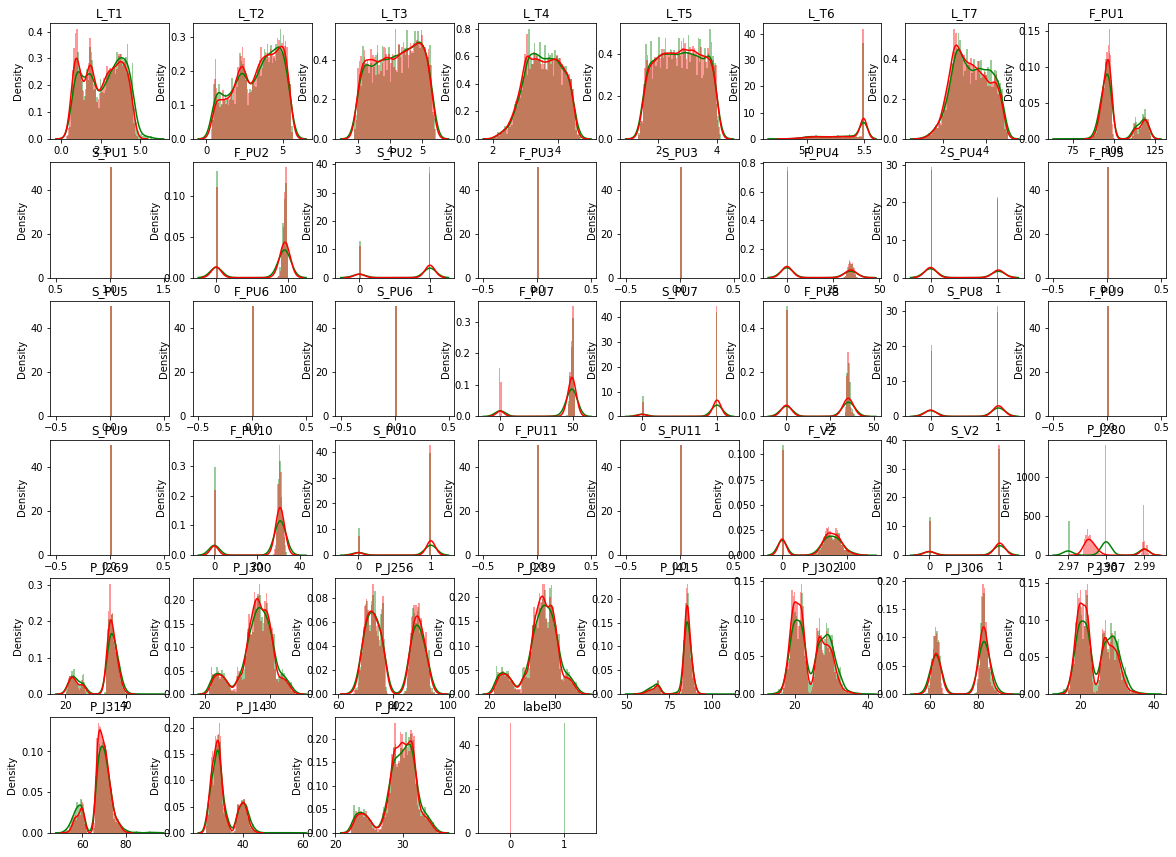

In [32]:
columns = df.drop('label', axis=1).columns
grid = gridspec.GridSpec(8, 8)

plt.figure(figsize=(20,10*2))

for n, col in enumerate(df.columns):
    ax = plt.subplot(grid[n])
    sns.distplot(df[df.label==1][col], bins = 50, color='g')
    sns.distplot(df[df.label==0][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()


## CalCulating Z-Score

In [33]:
def ztest(feature):
    
    mean = normal[feature].mean()
    std = attack[feature].std()
    zScore = (attack[feature].mean() - mean) / (std/np.sqrt(sample_size))
    
    return zScore

## Extracting Significant Features from the dataset

In [34]:
columns= df.drop('label', axis=1).columns
normal= df[df.label==0]
attack= df[df.label==1]
sample_size=len(attack)
significant_features=[]
critical_value=2.58

for i in columns:
    
    z_vavlue=ztest(i)
    
    if( abs(z_vavlue) >= critical_value):    
        print(i," is statistically significant") #Reject Null hypothesis. i.e. H0
        significant_features.append(i)

L_T1  is statistically significant
L_T6  is statistically significant
L_T7  is statistically significant
F_PU2  is statistically significant
S_PU2  is statistically significant
F_PU7  is statistically significant
S_PU7  is statistically significant
F_PU8  is statistically significant
S_PU8  is statistically significant
F_PU10  is statistically significant
S_PU10  is statistically significant
F_V2  is statistically significant
S_V2  is statistically significant
P_J280  is statistically significant
P_J415  is statistically significant
P_J302  is statistically significant
P_J306  is statistically significant
P_J307  is statistically significant
P_J317  is statistically significant
P_J14  is statistically significant


In [35]:
significant_features.append('label')

In [36]:
df = df[significant_features]

## Building Seperate Dataset for Anomaly Detection

In [37]:
inliers = df[df.label==0]
ins = inliers.drop(['label'], axis=1)

outliers = df[df.label==1]
outs = outliers.drop(['label'], axis=1)

ins.shape, outs.shape

((6945, 20), (3141, 20))

## Function to get the Accuracy

In [38]:
def normal_accuracy(values):
    
    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)
    
    return accuracy

def fraud_accuracy(values):
    
    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)
    
    return accuracy

## Isolation Forest for Anomaly Detection

In [39]:
ISF = IsolationForest(random_state=137)
ISF.fit(ins)

IsolationForest(random_state=137)

In [40]:
normal_isf = ISF.predict(ins)
fraud_isf = ISF.predict(outs)

## Accuracy for Isolation Forest Model

In [41]:
in_accuracy_isf=normal_accuracy(normal_isf)
out_accuracy_isf=fraud_accuracy(fraud_isf)
print("Accuracy in Detecting Normal Cases:", in_accuracy_isf)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_isf)

Accuracy in Detecting Normal Cases: 0.6366
Accuracy in Detecting Fraud Cases: 0.5183


## LOF Model for Anomaly Detection

In [42]:
LOF = LocalOutlierFactor(novelty=True)
LOF.fit(ins)

LocalOutlierFactor(novelty=True)

In [43]:
normal_lof = LOF.predict(ins)
fraud_lof = LOF.predict(outs)

## Accuracy for LOF Model

In [44]:
in_accuracy_lof=normal_accuracy(normal_lof)
out_accuracy_lof=fraud_accuracy(fraud_lof)
print("Accuracy in Detecting Normal Cases:", in_accuracy_lof)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_lof)

Accuracy in Detecting Normal Cases: 0.9808
Accuracy in Detecting Fraud Cases: 0.1162


# Plot Graph for comparision

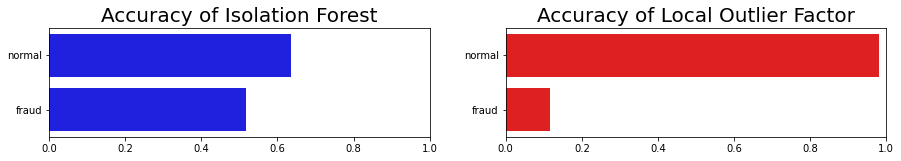

In [45]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=[15,2])

ax1.set_title("Accuracy of Isolation Forest",fontsize=20)
sns.barplot(x=[in_accuracy_isf,out_accuracy_isf], 
            y=['normal', 'fraud'],
            label="classifiers", 
            color="b", 
            ax=ax1)
ax1.set(xlim=(0,1))

ax2.set_title("Accuracy of Local Outlier Factor",fontsize=20)
sns.barplot(x=[in_accuracy_lof,out_accuracy_lof], 
            y=['normal', 'fraud'], 
            label="classifiers", 
            color="r", 
            ax=ax2)
ax2.set(xlim=(0,1))
plt.show()

# Prediction Model

In [46]:
X = df.drop('label', axis = 1)
y = df['label']

## Test Train Split Dataset

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45, stratify=y)

## AutoML And Settings

In [42]:
# automl = AutoML()
# settings = {
#     "time_budget": 300,  # total running time in seconds
#     "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
#                            # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
#     "task": 'classification',  # task type
#     "seed": 42,    # random seed
# }
# automl.fit(X_train=X_train, y_train=y_train, **settings)

## XGBoost Model for classification

In [48]:
model = XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.9480491857726955,
              learning_rate=0.4433369998455015, max_depth=7,
              min_child_weight=1.5981523613778321, n_estimators=8, n_jobs=-1,
              reg_alpha=0.0009765625, reg_lambda=0.15817424342486922,
              subsample=0.9186551030103914, use_label_encoder=False,
              verbosity=0)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=0.9480491857726955, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.4433369998455015, max_delta_step=0, max_depth=7,
              min_child_weight=1.5981523613778321, missing=nan,
              monotone_constraints='()', n_estimators=8, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0.0009765625,
              reg_lambda=0.15817424342486922, scale_pos_weight=1,
              subsample=0.9186551030103914, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=0)

# Metrics

In [53]:
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [54]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [58]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2083    1]
 [   0  942]]


In [62]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9994694960212203

# Saving Model

In [53]:
import pickle
dbfile = open('model.pickle', 'wb')
pickle.dump(model, dbfile)                     
dbfile.close()

# Adding these columns to IDS_tests.py to predict with only these columns.

In [55]:
significant_features

['L_T1',
 'L_T6',
 'L_T7',
 'F_PU2',
 'S_PU2',
 'F_PU6',
 'S_PU6',
 'F_PU7',
 'S_PU7',
 'F_PU8',
 'S_PU8',
 'F_PU10',
 'S_PU10',
 'F_PU11',
 'S_PU11',
 'F_V2',
 'S_V2',
 'P_J280',
 'P_J415',
 'P_J302',
 'P_J306',
 'P_J307',
 'P_J14',
 'label']